

# Project: Inverstigating a dataset - No-Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Clean">Data Cleaning</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis consists of exploring a dataset containing more than 100k medical appointments from the Brazilian public health system, which is focused on the question of whether or not patients showed up for their appointment. We're gonna explore the no-show appointments dataset using these variables:

- PatientId: Identification of a patient.
- AppointmentID: Identification of each appointment.
- Gender: F or M.
- AppointmentDay: The day of the actuall appointment.
- ScheduledDay: The day the patient set up their appointment.
- Age: The patient age.
- Neighbourhood: Hospital location.
- Scholarship: True or False, indicates if the patient is enrolled in the Brasilian welfare program.
- Hipertension: Indicates if the patient has hipertension.
- Diabetes: indicates if the patient has diabetes or not.
- Alcoholism: Indicates if the patient is an alcoholic or not.
- Handcap: ndicates if the patient is handicaped or not.
- SMS_received: One or more messages sent to the patient.
- No-show: "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up.

Questions:
- 1- What is the percentage of appointment shows versus no shows?
- 2- What is average age of patients who showed up & not showed up in their appointment? 
- 3- What is the gender distribution for show & no-show appointments?
- 4- Does having a scholarship affects the number of show up appointments or no? 
- 5- Does receive an appointment reminder message affects the number of show up appointments or no?
- 6- Which neighborhoods have the highest number of shows & no_shows?

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [72]:
Appt = pd.read_csv('/Users/Abdulaziz/Desktop/noshowappointments.csv')
Appt.shape

(110527, 14)

In [73]:
Appt.AppointmentDay.min(), Appt.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [74]:
Appt.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [75]:
# Changing column case and using underscores to make columns easier to read and work with.
Appt.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
Appt.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [76]:
Appt.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
Appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [78]:
Appt.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Observations:
- We have +110k rows and 14 columns in this dataset.
- Most of the patients ages are about 37 yeas old with almost no scholarship.
- 19% of the patients have hipertension.
- 7% of the patients have diabetes.
- 3% of the patients suffers from alcoholism.
- 2% of the patients are handicapped.
- The dataset does not contain any missing values.
- The patient_id data type is float but should be int.
- The scheduled_day and appointment_day columns type should be changed to datetime.
- 75% of patients received sms regarding an appointment.

<a id='Clean'></a>

# Data Cleaning 

#### 1- Change the patient_id data type to int.

In [79]:
patient_ids_float = Appt[~ Appt.patient_id.apply(lambda x: x.is_integer())]
print('{} patients_ids are not integers'.format(len(patient_ids_float)))
patient_ids_float

5 patients_ids are not integers


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [80]:
# Extract float patient_ids from the above list.
patient_if = [93779.52927, 537615.28476, 141724.16655, 39217.84439, 43741.75652]

# Convert all float patient_ids to int and check if the same number exist in the dataset.
for i in range(len(patient_if)):
    patient_if[i] = int(patient_if[i])
    if Appt.query('patient_id == {}'.format(patient_if[i])).empty:
        print('Patient id == {} not exist.'.format(patient_if[i]))
    else:
        print('Patient id == {} is exist.'.format(patient_if[i]))

Patient id == 93779 not exist.
Patient id == 537615 not exist.
Patient id == 141724 not exist.
Patient id == 39217 not exist.
Patient id == 43741 not exist.


In [81]:
# Convert the patient id from float to int.
Appt['patient_id'] = Appt['patient_id'].astype('int')
Appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


#### 2- Change the scheduled_day and appointment_day columns type to datetime.

In [82]:
Appt['scheduled_day'] = pd.to_datetime(Appt['scheduled_day'])
Appt['appointment_day'] = pd.to_datetime(Appt['appointment_day'])

In [83]:
Appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 11.8+ MB


#### 3- Create two new column scheduled_dow & appointment_dow (dow = day of week) and the time between them.

In [84]:
Appt['scheduled_day'] = pd.to_datetime(Appt['scheduled_day'])
Appt['appointment_day'] = pd.to_datetime(Appt['appointment_day'])
Appt['elapsed_days'] = Appt['appointment_day'] - Appt['scheduled_day']

Appt['scheduled_dow'] = Appt['scheduled_day'].dt.weekday_name
Appt['appointment_dow'] = Appt['appointment_day'].dt.weekday_name
Appt.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,elapsed_days,scheduled_dow,appointment_dow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,Friday,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,Friday,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,Friday,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,Friday,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,Friday,Friday
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09,Wednesday,Friday
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48,Wednesday,Friday
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02,Wednesday,Friday
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,-1 days +15:57:44,Friday,Friday
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35,Wednesday,Friday


#### 4- convert no show data type from string to int, so we can handle using plot or goupby.

In [85]:
Appt.no_show[Appt['no_show'] == 'Yes'] = '1'
Appt.no_show[Appt['no_show'] == 'No'] = '0'
Appt['no_show'] = pd.to_numeric(Appt['no_show'])
Appt.head(10)

/Users/Abdulaziz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Abdulaziz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,elapsed_days,scheduled_dow,appointment_dow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1 days +05:21:52,Friday,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1 days +07:51:33,Friday,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1 days +07:40:56,Friday,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1 days +06:30:29,Friday,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1 days +07:52:37,Friday,Friday
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1 days 15:23:09,Wednesday,Friday
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:54:48,Wednesday,Friday
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:20:02,Wednesday,Friday
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0,-1 days +15:57:44,Friday,Friday
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1 days 11:11:35,Wednesday,Friday


#### 5- Remove Age outliers.

Some illogical data have been found such as patients with age 0 or less, so i will not use them in the next stage.

In [126]:
def main ():
    
    if (Appt.age < 0):
        st= " age leass that 0"
    print(st)

In [86]:
Appt = Appt[(Appt.age >= 0) & (Appt.age <= 95)]
Appt.shape

(110480, 17)

#### 6- Created a dataframe contains all no_show records.

In [103]:
no_shows = Appt.query('no_show == "1"')
days = no_shows['elapsed_days'].mean()
timeframe_n= days / np.timedelta64(1, 'D')

#### 7- Created a dataframe contains all show records.

In [104]:
shows = Appt.query('no_show == "0"')
days = no_shows['elapsed_days'].mean()
timeframe_s = days / np.timedelta64(1, 'D')

<a id='eda'></a>
## Exploratory Data Analysis

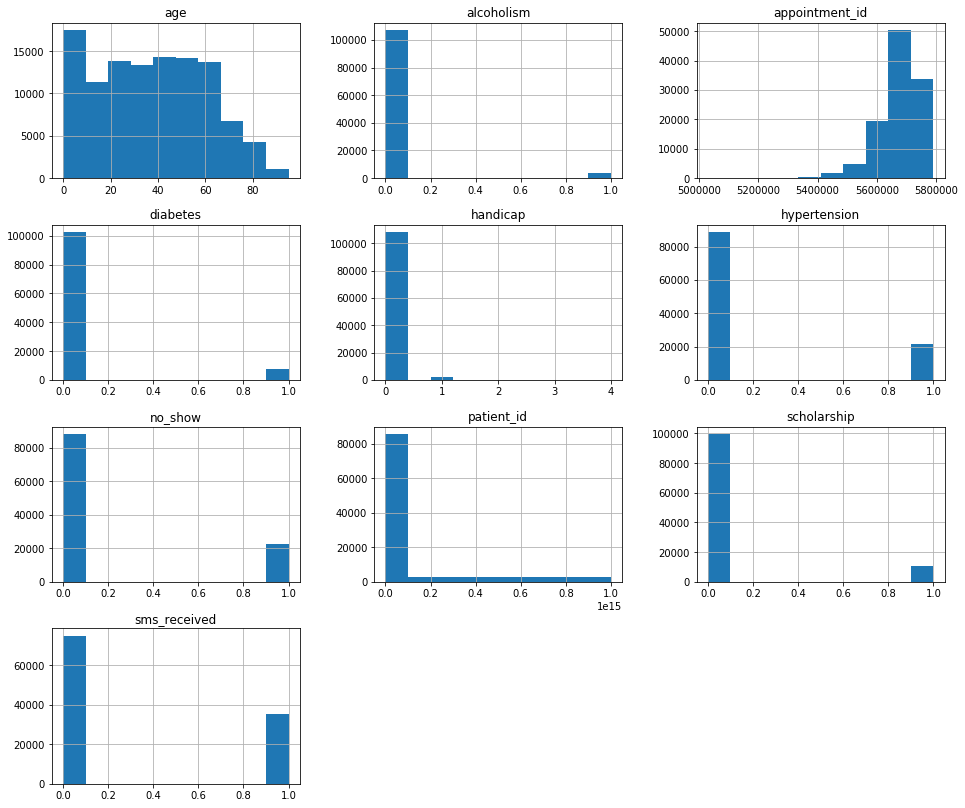

In [89]:
Appt.hist(figsize=(16,14));

#### Histogram observations
- age: There are many very young people in the dataset comparing to the number of old people.
- alcoholism: Most of the patients are not alcoholics.
- diabetes: Most of the patients are not diabetes.
- handicap: Most of the patients in the dataset are not handicapped.
- hypertension: Most patients do not have hypertension diagnosed.
- scholarhip: about 9% of the patients does not have scholarship.

### Question 1: What is the percentage of appointment shows versus no shows?

In [90]:
SVN = Appt.groupby('no_show')['no_show'].agg(['count'])
SVN.reset_index(inplace=True)
SVN.columns = ['appt_status', 'Total']
SVN.iloc[0,0] = "No Show"
SVN.iloc[1,0] = "Show"

In [91]:
noshows_prop = SVN.iloc[0,1] / (SVN.iloc[0,1] + SVN.iloc[1,1])
shows_prop = SVN.iloc[1,1] / (SVN.iloc[0,1] + SVN.iloc[1,1])

In [92]:
SVN['proportion'] = [noshows_prop, shows_prop]
SVN.head()

,appt_status,Total,proportion
0,No Show,88168,0.798045
1,Show,22312,0.201955


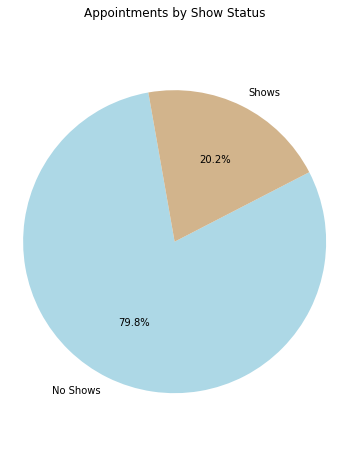

In [93]:
labels = ['No Shows', 'Shows']
sizes = [noshows_prop, shows_prop]
colors = ['lightblue', 'tan']
explode = (0, 0.1)

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=100)
plt.title('Appointments by Show Status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(6,8);


-- Around 80% of patients have showd up in their appointments

### Question 2: What is average age of patients who showed up & not showed up in their appointment? 

In [115]:
Ms= shows.age.mean()
Ms

37.763757825968604

In [116]:
Mns= no_shows.age.mean()
Mns

34.295580853352455

-- The mean age of patietnis that showed up in their appointments are 37.7 years while the mean age of the pateients who did not attend their appointments are 34.2 years.

### Question 3: What is the gender distribution for show & no-show appointments?

In [ ]:
Apf = len(Appt.loc[Appt['gender'] == "F"])
Apm = len(Appt.loc[Appt['gender'] == "M"])

Mapf = len(Appt.query('no_show == "Yes" and gender == "F"'))
Mapm = len(Appt.query('no_show == "Yes" and gender == "M"'))

Mrf = int(round(Mapf/Apf*100))
Mrm = int(round(Mapm/Apm*100))

pl = sns.countplot(x=Appt.gender, hue=Appt.no_show, data=Appt)
pl.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

-- Around 20% of Female patients appointments were missed.

-- Around 20% of Male patients appointments were missed.

### Question 4: Does having a scholarship affects the number of show up appointments or no? 


scholarship
0    0.198095
1    0.237363
Name: no_show, dtype: float64


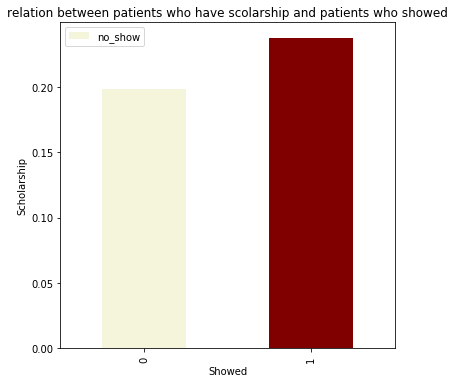

In [117]:
print(Appt.groupby('scholarship')['no_show'].mean())
Appt.groupby('scholarship')['no_show'].mean().plot(kind = 'bar',figsize=(6,6), color= ['beige','maroon'])
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("relation between patients who have scolarship and patients who showed")
plt.legend()

--- As it can be seen from the above bar graph, the scholarship does not significantly affect whether or not patients attend their appointments.

### Question 5: Does receive an appointment reminder message affects the number of show up appointments or no?

sms_received
0    0.167036
1    0.275777
Name: no_show, dtype: float64


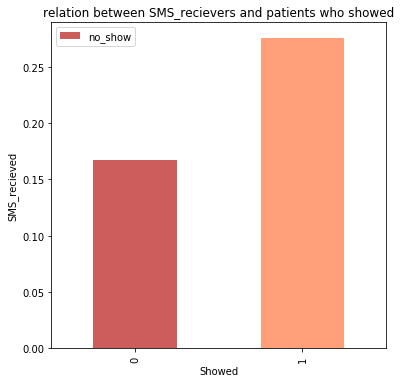

In [118]:
print(Appt.groupby('sms_received')['no_show'].mean())
Appt.groupby('sms_received')['no_show'].mean().plot(kind='bar',figsize=(6,6), color= ['indianred','lightsalmon']);
plt.xlabel("Showed")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who showed")
plt.legend()

---- As it can be seen from the above graph, the sms reminder message has a big affect on helping the patients reminds their appointment.

### Question 6: Which neighborhoods have the highest number of shows & no_shows?

In [111]:
# Top 10 neighborhoods by shows
shows_by_hood = shows.groupby("neighbourhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,neighbourhood,count
37,JARDIM CAMBURI,6249
42,MARIA ORTIZ,4585
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3243
65,SANTA MARTHA,2633
10,CENTRO,2630
35,ITARARÉ,2591
77,TABUAZEIRO,2557
68,SANTO ANTÔNIO,2259
8,BONFIM,2221


In [112]:
# Top 10 neighborhoods by shows
shows_by_hood = no_shows.groupby("neighbourhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,neighbourhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,548


---- It is obvious now that the people living in JARDIM CAMBURI and MARIA ORTIZ are the most people making a medical appointments and they are also the most people are on the show up list.

<a id='conclusions'></a>
## Conclusions

I have looked into the dataset and managed a few problems like changing names to small letters, removing wrong data on age column, adding new columns based on existing data. I have also investigated some of the variables and made a few observations comparing them to each other as well as to the dependent variable (no_show). As this was only an ED analysis, many potential correlations may remain uncovered.

Results: 
- 1- Nearly 20% of patientd did not attend their appointments. 
- 2- SMS reminder message increases the show ups numbers.
- 3- The (%) of patients who have a scholarship is nearly 9%.
- 4- The (%) of patients who received an SMS reminder is 32%.
- 5- The average of age for people who will be most likely to show up is 37.3, and the average age for people who are not likely to attend their appointment is 34.2.
- 6- JARDIM CAMBURI was the first neighborhoods in both the no-shows and shows segments.


Limitations:
- 1- The data set explored in this analysis was for about 2 month period. Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.
- 2- There we some illogical data such as patients with age 0.
- 3- Lots of the columns used categorical data which makes it more difficult to analyze and visualize.